# EPFL MAP - YEAR 2016

In [2]:
import json
import pickle
import collections
from BuildGraphModule import *
from unidecode import unidecode
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with open('paper.json', 'r') as f:
    data = json.load(f)

In [4]:
# Uniform strings - Authors
for i in list(data.keys()):
    try:
        for j in range(len(data[i]['Authors'])):
            t = unidecode(data[i]['Authors'][j])
            t.encode("ascii")
            data[i]['Authors'][j] = t.lower().replace('.','')
            
    except:
        continue

In [5]:
data_cut = {}
for paper in list(data.keys()):
    try:
        if int(data[paper]['Publication date']) == 2016:
            data_cut[paper] = data[paper]
    except:
        continue

In [7]:
# (lab,website)
dict_lab_site = {}
# (lab, num publications)
dict_labs = defaultdict(int)
# (lab, list of papers)
dict_labs_paper = defaultdict(list)
i = 0
for paper in list(data_cut.keys()):
    try:
        if len(data_cut[paper]['Labs involved']) == 1:
            dict_lab_site[list(data_cut[paper]['Labs involved'][0].keys())[0]] = list(data_cut[paper]['Labs involved'][0].values())[0]
            dict_labs[list(data_cut[paper]['Labs involved'][0].keys())[0]] += 1
            dict_labs_paper[list(data_cut[paper]['Labs involved'][0].keys())[0]] += [paper]
            
        else:
            #print ('else')
            for lab in data_cut[paper]['Labs involved']:
                dict_lab_site[list(lab.keys())[0]] = list(lab.values())[0]     
                dict_labs[list(lab.keys())[0]] += 1
                dict_labs_paper[list(lab.keys())[0]] += [paper]
    except:
        continue

In [19]:
dict_labs_paper

defaultdict(list,
            {' IPESE (sci-sti-fm)': ['210192',
              '218377',
              '219156',
              '214833',
              '221585',
              '221558',
              '218949',
              '220321',
              '217509',
              '218716',
              '218004',
              '220477',
              '217932',
              '221498',
              '220206'],
             ' Prof. Tang Group': ['220755'],
             'Advanced Oxidation Processes Group': ['221450'],
             'Applied Computing and Mechanics Laboratory': ['218608',
              '218605',
              '218566',
              '221310',
              '219023',
              '222837',
              '218607',
              '221266',
              '221309',
              '222833'],
             'Applied Signal Processing Group': ['221471',
              '221466',
              '218370',
              '221899',
              '221470',
              '222364',
              '218871',

In [14]:
# Dictionary (lab, id)
dict_lab_id = {}
for  id_,lab in enumerate(list(dict_labs_paper.keys())):
    dict_lab_id[lab] = id_

In [52]:
# Nodes: labs
nodes = []
for lab in list(dict_labs_paper.keys()):
    nodes += [dict_lab_id[lab]]

In [24]:
# Define edges of the graph: labs that writes papers together
#edges = []
dict_edges = {}
for lab in list(dict_labs_paper.keys()):
    dict_edges[lab] = defaultdict(list) 
    for lab_2 in list(dict_labs_paper.keys()):
        if lab_2 != lab:
            list_intersection = [p for p in dict_labs_paper[lab] if p in dict_labs_paper[lab_2]]
            if len(list_intersection) != 0:
                dict_edges[lab][lab_2] += list_intersection
            #dict_edges[lab_2][lab] += [p for p in dict_labs_paper[lab] if p in dict_labs_paper[lab_2]]

In [27]:
dict_edges

{' IPESE (sci-sti-fm)': defaultdict(list,
             {'Laboratory for Industrial Energy Systems': ['220321', '218716'],
              'Solar Energy and Building Physics Laboratory': ['221558'],
              'Transportation and Mobility Laboratory': ['217932']}),
 ' Prof. Tang Group': defaultdict(list, {}),
 'Advanced Oxidation Processes Group': defaultdict(list,
             {'CEL Group': ['221450'],
              'Laboratory of Physical and Analytical Electrochemistry': ['221450']}),
 'Applied Computing and Mechanics Laboratory': defaultdict(list, {}),
 'Applied Signal Processing Group': defaultdict(list, {}),
 'Archives of Modern Building': defaultdict(list, {}),
 'Archizoom - Conferences and exhibitions': defaultdict(list,
             {'Chôros Laboratory': ['217129'],
              'Digital Humanities Laboratory': ['217129']}),
 'Artificial Intelligence Laboratory': defaultdict(list, {}),
 'Arts of sciences laboratory - Archives of imaginary': defaultdict(list,
             {'Ch

In [33]:
edges = []
weigths = {}
for lab in dict_edges:
    if len(dict_edges[lab]) != 0:
        for lab_2 in dict_edges[lab]:
            edges += sorted([(dict_lab_id[lab], dict_lab_id[lab_2])])
            weigths[(dict_lab_id[lab], dict_lab_id[lab_2])] = len(dict_edges[lab][lab_2])

In [35]:
weigths

{(0, 47): 1,
 (0, 57): 5,
 (0, 146): 9,
 (1, 92): 1,
 (1, 102): 1,
 (2, 6): 1,
 (2, 158): 1,
 (2, 192): 1,
 (2, 200): 1,
 (3, 47): 1,
 (3, 86): 1,
 (4, 43): 1,
 (4, 157): 2,
 (6, 2): 1,
 (6, 55): 2,
 (10, 71): 4,
 (11, 182): 2,
 (14, 43): 3,
 (16, 65): 1,
 (17, 43): 1,
 (17, 183): 2,
 (20, 167): 1,
 (20, 208): 1,
 (21, 69): 1,
 (22, 47): 11,
 (22, 54): 1,
 (22, 86): 1,
 (22, 90): 1,
 (22, 94): 1,
 (22, 98): 2,
 (22, 120): 1,
 (22, 136): 1,
 (22, 140): 1,
 (22, 165): 2,
 (22, 177): 1,
 (22, 193): 3,
 (23, 47): 2,
 (23, 80): 2,
 (24, 134): 2,
 (25, 184): 2,
 (29, 206): 1,
 (30, 184): 1,
 (32, 56): 2,
 (32, 137): 1,
 (32, 144): 1,
 (34, 101): 1,
 (34, 194): 1,
 (37, 144): 3,
 (38, 47): 3,
 (38, 49): 2,
 (38, 146): 1,
 (41, 103): 4,
 (43, 4): 1,
 (43, 14): 3,
 (43, 17): 1,
 (43, 122): 4,
 (43, 183): 1,
 (44, 82): 2,
 (47, 0): 1,
 (47, 3): 1,
 (47, 22): 11,
 (47, 23): 2,
 (47, 38): 3,
 (47, 49): 3,
 (47, 50): 1,
 (47, 54): 3,
 (47, 71): 22,
 (47, 80): 2,
 (47, 86): 11,
 (47, 90): 10,
 (47, 

In [ ]:
# Which are the laboratories which collaborated most in 2016?

# Create the graph

In [53]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
G=nx.Graph()

In [55]:
G.add_nodes_from(nodes)

In [56]:
G.add_edges_from(edges)

In [71]:
for i,j in edges:
    G[i][j]['weight'] = weigths[(i,j)]

In [73]:
print (nx.info(G))

Name: 
Type: Graph
Number of nodes: 209
Number of edges: 152
Average degree:   1.4545


In [74]:
spring_pos = nx.spring_layout(G)

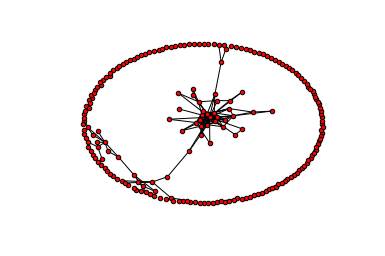

In [75]:
plt.axis('off')
nx.draw_networkx(G, pos = spring_pos, with_labels=False, node_size=20)

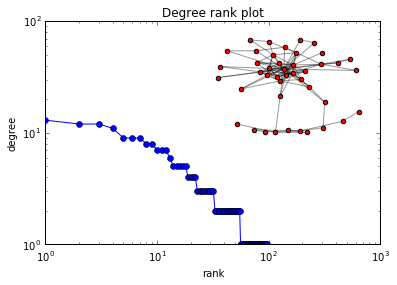

In [87]:
import networkx as nx
import matplotlib.pyplot as plt

degree_sequence=sorted(nx.degree(G).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.savefig("degree_histogram.png")
plt.show()

In [104]:
betweeness_sequence=nx.degree_centrality(G)

In [105]:
import operator
sorted_x = sorted(betweeness_sequence.items(), key=operator.itemgetter(1), reverse = True)

In [106]:
sorted_x[:20]

[(47, 0.13461538461538464),
 (120, 0.0625),
 (22, 0.057692307692307696),
 (71, 0.057692307692307696),
 (193, 0.05288461538461539),
 (86, 0.04326923076923077),
 (140, 0.04326923076923077),
 (166, 0.04326923076923077),
 (90, 0.038461538461538464),
 (94, 0.038461538461538464),
 (113, 0.03365384615384616),
 (144, 0.03365384615384616),
 (146, 0.03365384615384616),
 (50, 0.028846153846153848),
 (43, 0.02403846153846154),
 (54, 0.02403846153846154),
 (98, 0.02403846153846154),
 (165, 0.02403846153846154),
 (177, 0.02403846153846154),
 (2, 0.019230769230769232)]

In [107]:
dict_id_lab = {v: k for k, v in dict_lab_id.items()}

In [109]:
dict_id_lab[22]

'Laboratory of Theory and History of Architecture 3'

In [ ]:
# Number of papers two labs pubilsh together